# Machine Learning HW4 Simulation Part (Support Vector Machine (SVM) Classifier)
## Amirmahdi Ansaripour (810198358)

In this exercise, we are going to become familiar with the SVM classifier. The optimization problem based on which SVM works is :

$ \vec{w}^\ast , b^\ast =  \underset{\vec{w} , b}{\operatorname{argmax}} \space (\text{margin}(\vec{w}, b)) $

( $\text{subject to} \;\; y_i(w^Tx_i + b) \ge 1$ )

By employing the Lagrangian function and considering that the problem is of convex type, the hard condition mentioned above can become a much simpler inequality :

$\underset{\lambda}{\operatorname{argmax}} \space g(\lambda) \;\;\;\; ( \text{subject to} \; \lambda_i \ge 0 )$

Pay attention to the concept of $\text{margin}$ and why it should be maximized in SVM :

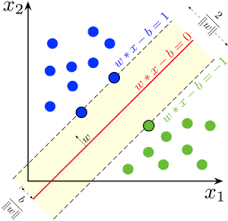

In this exercise, the $\text{Iris}$ dataset is going to be analyzed. Methods such as employing different kernels and adding regularization terms are used in order to make our prediction as accurate as possible. The parameters used for evaluation are:

1. $ \space Precision = \frac{TP}{TP + FP} $

2. $ \space Recall = \frac{TP}{TP + FN} $

3. $ \space F1score = \frac{2*Precision*Recall}{Precision + Recall} $


In [39]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import numpy as np

In [30]:
df = datasets.load_iris()

In [31]:
features = df.data
labels = df.target

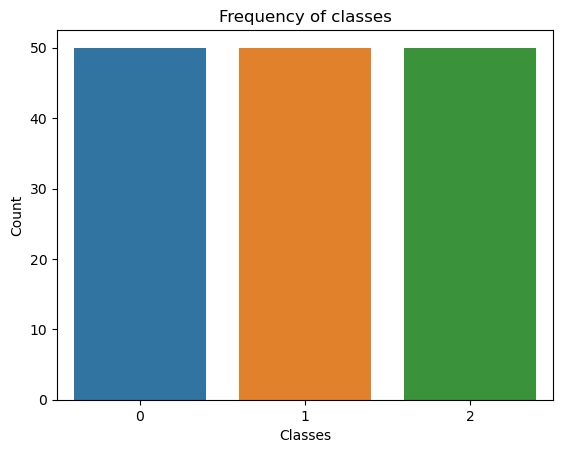

In [32]:
sns.countplot(x = labels.ravel())
plt.title("Frequency of classes")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [7]:
def split_into_train_test(x, y):
    return train_test_split(x, y, train_size = 0.7, stratify = y, random_state = 0)

In [8]:
def display_distribution(x, y, xlab, ylab, tit):
    class1 = []
    class2 = []
    class3 = []
    for i in range(len(y)):
        if y[i] == 0:
            class1.append([x[i][0], x[i][1]])
        elif y[i] == 1:
            class2.append([x[i][0], x[i][1]])
        else:
            class3.append([x[i][0], x[i][1]])
    draw(class1, class2, class3, xlab, ylab, tit)

In [9]:
def fit_svm(kernel_, binary, x_t, y_t):
    if kernel_ == 'poly':
        model = svm.SVC(kernel = kernel_, decision_function_shape = binary, degree = 3).fit(x_t, y_t)
    else: 
        model = svm.SVC(kernel = kernel_, decision_function_shape = binary).fit(x_t, y_t)
    return model

In [10]:
def specify(x, y):
    c1 = []
    c2 = []
    c3 = []
    for i in range(len(labels)):
        if labels[i] == 0:
            c1.append([x[i], y[i]])
        elif labels[i] == 1:
            c2.append([x[i], y[i]])
        else:
            c3.append([x[i], y[i]])
    return c1, c2, c3

In [11]:
def draw(class1, class2, class3, x_label, y_label, title_):
    plt.scatter([class1[i][0] for i in range(len(class1))], [class1[i][1] for i in range(len(class1))], s = 100, c = 'purple', edgecolors='grey')
    plt.scatter([class2[i][0] for i in range(len(class2))], [class2[i][1] for i in range(len(class2))], s = 100, c = 'green', edgecolors='grey')
    plt.scatter([class3[i][0] for i in range(len(class3))], [class3[i][1] for i in range(len(class3))], s = 100, c = 'yellow', edgecolors='grey')
    plt.xlabel(x_label)
    plt.legend(['class0', 'class1', 'class2'], loc = 'upper right')
    plt.ylabel(y_label)
    plt.title(title_)
    plt.show()

In [12]:
def show_results(x, y, model, x_label, y_label, title_):
    x_scale = np.arange(x.min() - 1, x.max() + 1, 0.1)
    y_scale = np.arange(y.min() - 1, y.max() + 1, 0.1)    
    grid_width, grid_height = np.meshgrid(x_scale, y_scale)
    prediction = model.predict(np.c_[grid_width.ravel(), grid_height.ravel()])
    prediction = prediction.reshape(grid_width.shape)
    plt.contour(grid_width, grid_height, prediction)
    class1, class2, class3 = specify(x, y)
    draw(class1, class2, class3, x_label, y_label, title_)

The show_result function is used to display the decision boundry made by SVM, and how points are classified.

In [13]:
def plot_confusion_matrix(model, test):
    y_pred = model.predict(test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'], fmt='d', annot=True, cmap=plt.cm.Blues)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(classification_report(y_test, y_pred))

# Part A: Classification based on the first two features (Sepal.length, Sepal.width), and linear kernel

After defining functions, we should use them in order to classify the Iris dataset into three labels. At first, the dataset is divided into test and train sets. The percentage of each class's label is equal in both train and test sets.

In [33]:
x_train, x_test, y_train, y_test = split_into_train_test(features[:, :2], labels)

In [38]:
# print(features[:, :2])

Text(0.5, 1.0, 'ratio of classes in test and train')

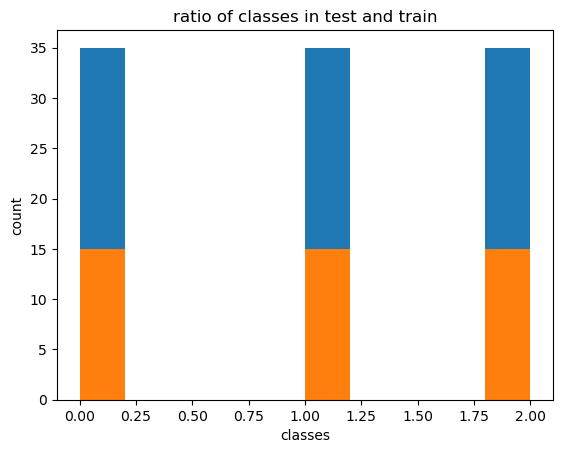

In [15]:
plt.hist(y_train)
plt.hist(y_test)
plt.xlabel('classes')
plt.ylabel('count')
plt.title('ratio of classes in test and train')

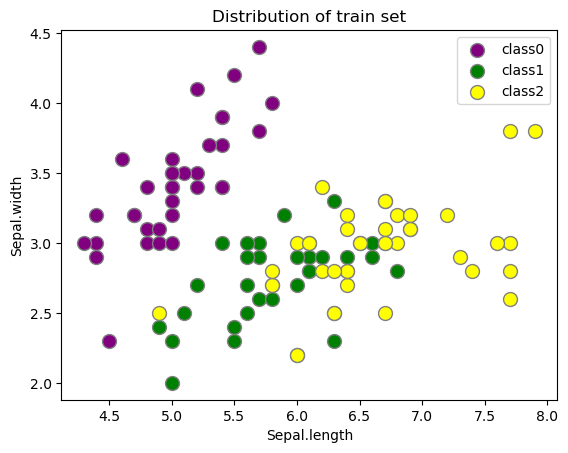

In [371]:
display_distribution(x_train, y_train, "Sepal.length", "Sepal.width", "Distribution of train set")

In [372]:
linear_svm = fit_svm('linear', 'ovo', x_train, y_train)

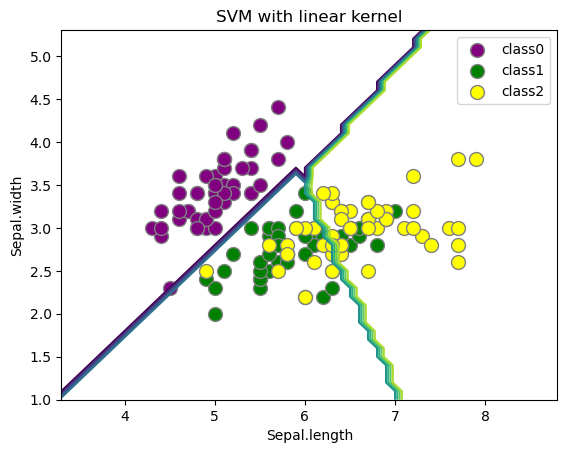

In [373]:
show_results(features[:, 0], features[:, 1], linear_svm, 'Sepal.length', 'Sepal.width', 'SVM with linear kernel')

### Analysis of output:
Based on the explanation in part A of assignment, the initial dataset consists of two features (Sepal.width, Sepal.length). Clearly, samples of class0 can be linearly seperated from those of class1 and class2. However, samples of class1 and 2 are mixed in an unorganized way, so their classification results are not very accurate.

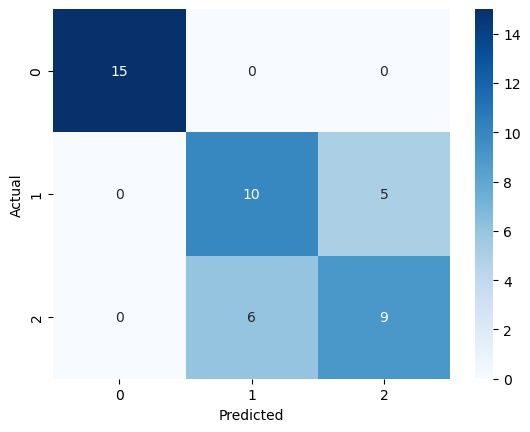

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [374]:
plot_confusion_matrix(linear_svm, x_test)

# Part B: Using other kernels (RBF, polinomial)

There are many kernels to be used for SVM, and their pros and cons are going to be discussed:

1. **Linear**: We use this kernel when samples are linearly separable. When there are plenty of features in a dataset, using linear kernel is recommended. It also has less complexity than other kernels, so models using this kernel are fast.
$$ K(x,y) = (x^Ty+c) $$ 

2. **Polinomial**: When unlinear patterns exist between samples, it is wiser to use polinomial kernels. As its formula indicates, it takes a degree ($d$). The higher the $d$ gets, the more probable our classification overfits. It can interpreted as the complexity of kernel.

$$ K(x,y) = (x^Ty+c)^d $$ 

3. **RBF**: this kernel puts a Gaussian distribution on each sample and sums them to make the decision boundry. It is a general-purpose kernel, meaning that we use it when there is no prior knowledge about the dataset.

$$ K(x,y) = exp(-\frac{||x - y||^2}{2}) $$ 


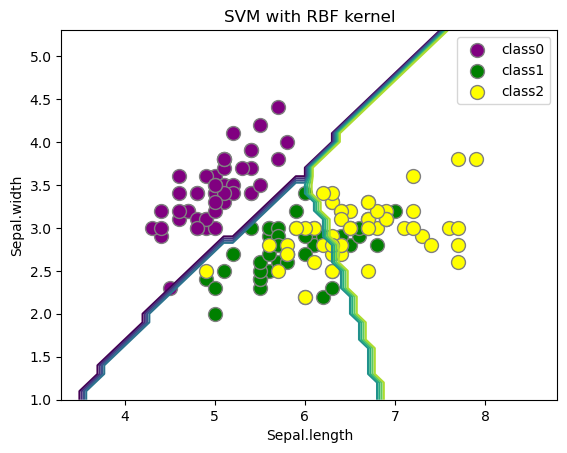

In [375]:
rbf_svm = fit_svm('rbf', 'ovo', x_train, y_train)
show_results(features[:, 0], features[:, 1], rbf_svm, 'Sepal.length', 'Sepal.width', 'SVM with RBF kernel')

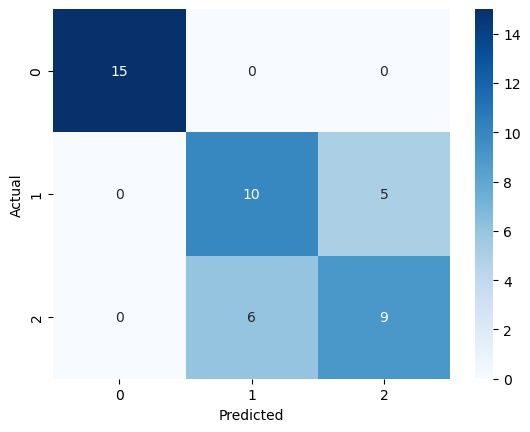

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [376]:
plot_confusion_matrix(rbf_svm, x_test)

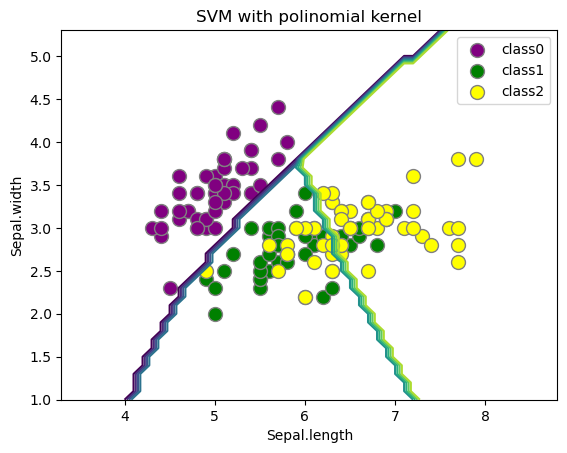

In [377]:
poly_svm = fit_svm('poly', 'ovo', x_train, y_train)
show_results(features[:, 0], features[:, 1], poly_svm, 'Sepal.length', 'Sepal.width', 'SVM with polinomial kernel')

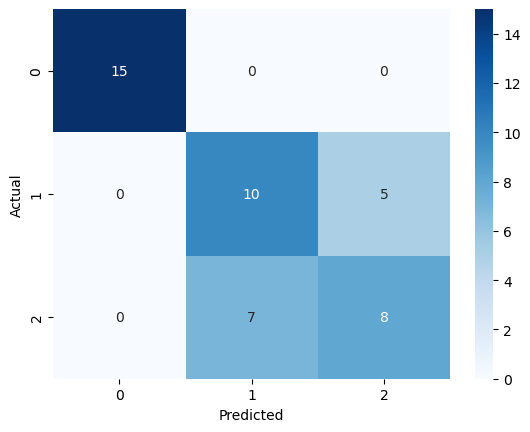

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.59      0.67      0.62        15
           2       0.62      0.53      0.57        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



In [378]:
plot_confusion_matrix(poly_svm, x_test)

### Analysis of output
As previously mentioned, class 0 can be linearly separated from other classes, so all three kernels have performed well on it (precision = recall = f1-score = 100%). However, the outputs of other labels are not desirable, especifically the recall of the third class. This means that our model has not learned the third class properly.  

## Part C: (Regularization) Changing C and Gamma parameters and visiualizing their effects
There are two parameters which determine how tolerant our model is to misclassifications. In other words, they show the complexity of our model.

1. **C**: This parameter acts like a penalty term. The higher its value, the more sensitive the model behaves towards misclassification errors. If it is set to small values, the result SVM is called Soft SVM.

$ \vec{w}^\ast , b^\ast =  \underset{\vec{w} , b}{\operatorname{argmin}} \space (\frac{1}{2} ||\vec{w}||^2 + c \sum_{i = 1}^n e_i) $

( $\text{subject to} \;\; y_i(w^Tx_i + b) \ge 1 - e_i$ )

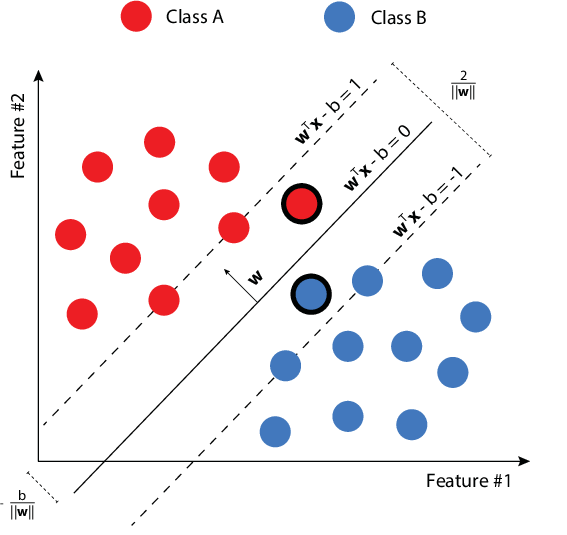


2. **Gamma**: This parameter is directly related to model complexity. In other words, the raduis of similarity is decreased as Gamma increases. Hence, samples which are closely located are grouped and a boundry forms around them. Obviously, as the raduis declines, fewer samples are clustered, and the model gets complicated.

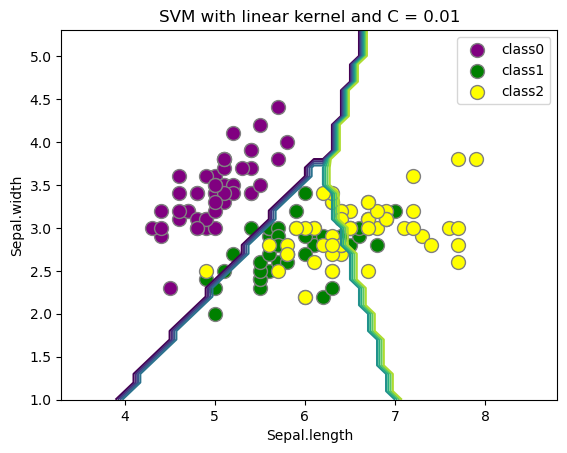

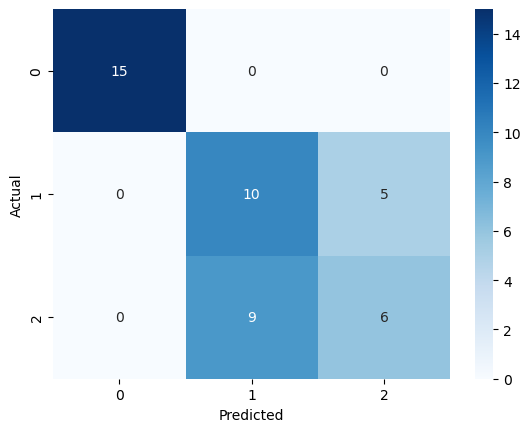

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.53      0.67      0.59        15
           2       0.55      0.40      0.46        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.68        45
weighted avg       0.69      0.69      0.68        45



In [447]:
linear_svm_param = svm.SVC(kernel = 'linear', decision_function_shape = 'ovo', C = 0.01).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], linear_svm_param, 'Sepal.length', 'Sepal.width', 'SVM with linear kernel and C = 0.01')
plot_confusion_matrix(linear_svm_param, x_test)
## Some missclassifications are accepted

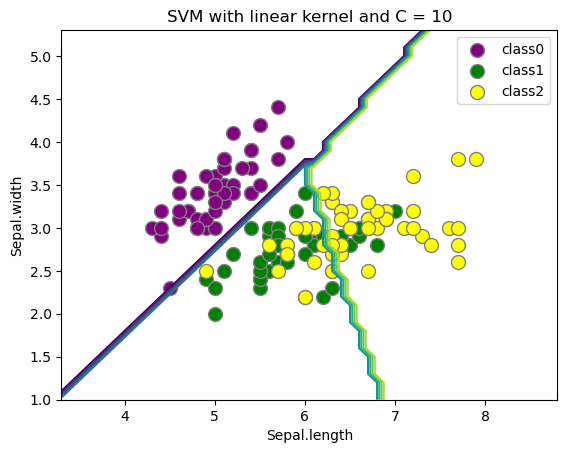

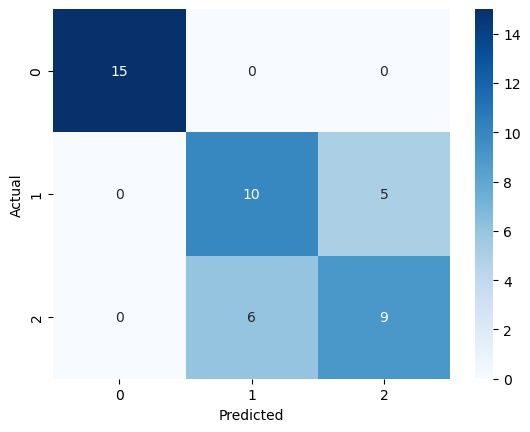

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [444]:
linear_svm_param = svm.SVC(kernel = 'linear', decision_function_shape = 'ovo', C = 10).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], linear_svm_param, 'Sepal.length', 'Sepal.width', 'SVM with linear kernel and C = 10')
plot_confusion_matrix(linear_svm_param, x_test)
## Decision boundry becomes tighter.

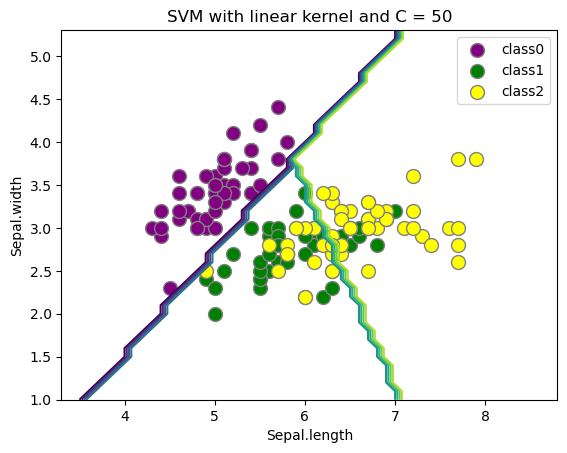

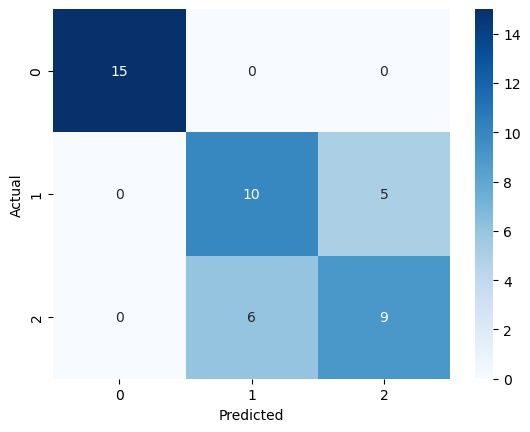

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [405]:
linear_svm_param = svm.SVC(kernel = 'linear', decision_function_shape = 'ovo', C = 50).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], linear_svm_param, 'Sepal.length', 'Sepal.width', 'SVM with linear kernel and C = 50')
plot_confusion_matrix(linear_svm_param, x_test)
## model has overfitted, and the boundry  (overfitting)

### Analysis of output
For low C values, like 0.01, the decison boudry lies at a noticeable distance from X_test samples of class 0. Although it seems that SVM tries to maximize the margin, we should not ignore that the model underfits and acts poorly for class 2. On the other hand, for C = 50, the model overfits because its boundries are very zig-zagged.

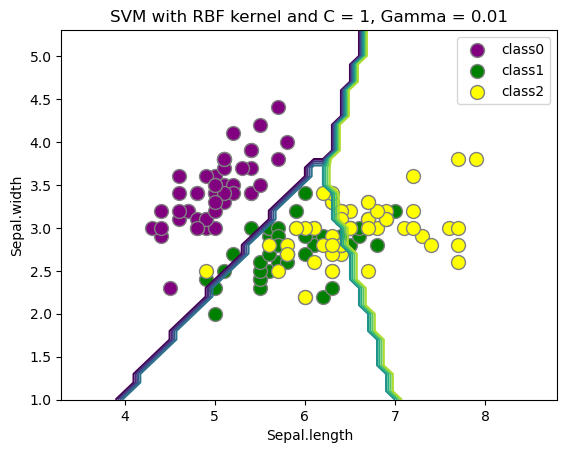

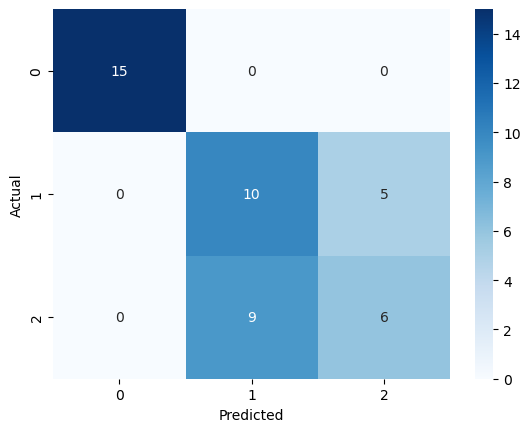

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.53      0.67      0.59        15
           2       0.55      0.40      0.46        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.68        45
weighted avg       0.69      0.69      0.68        45



In [406]:
rbf_svm_param = svm.SVC(kernel = 'rbf', decision_function_shape = 'ovo', C = 1, gamma = 0.001).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], rbf_svm_param, 'Sepal.length', 'Sepal.width', 'SVM with RBF kernel and C = 1, Gamma = 0.01')
plot_confusion_matrix(rbf_svm_param, x_test)
## Some misclassified samples are accepted

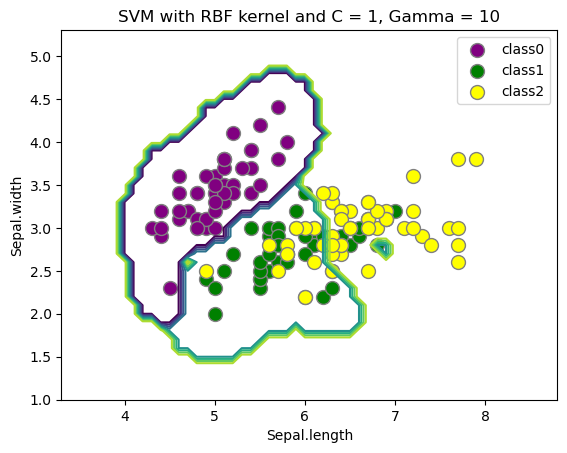

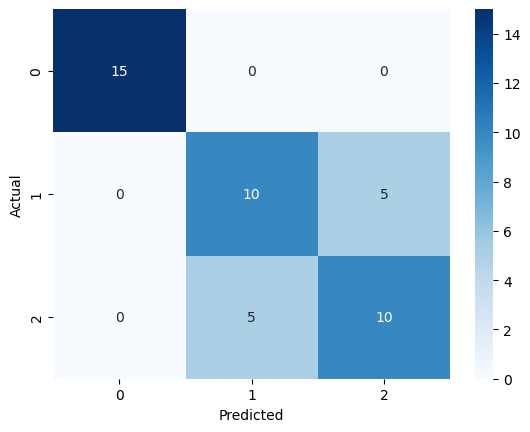

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.67      0.67      0.67        15
           2       0.67      0.67      0.67        15

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45



In [407]:
rbf_svm_param = svm.SVC(kernel = 'rbf', decision_function_shape = 'ovo', C = 1, gamma = 10).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], rbf_svm_param, 'Sepal.length', 'Sepal.width', 'SVM with RBF kernel and C = 1, Gamma = 10')
plot_confusion_matrix(rbf_svm_param, x_test)
## No misclassification

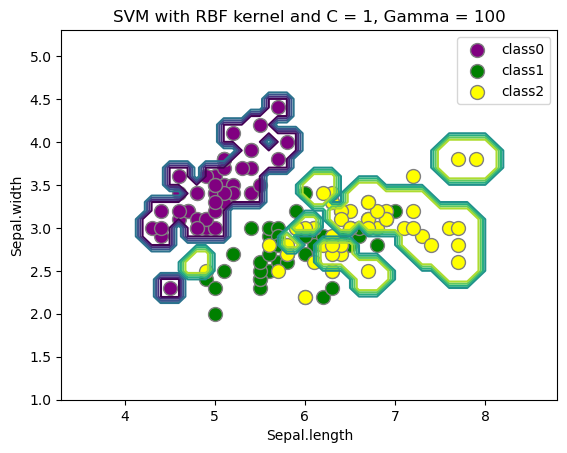

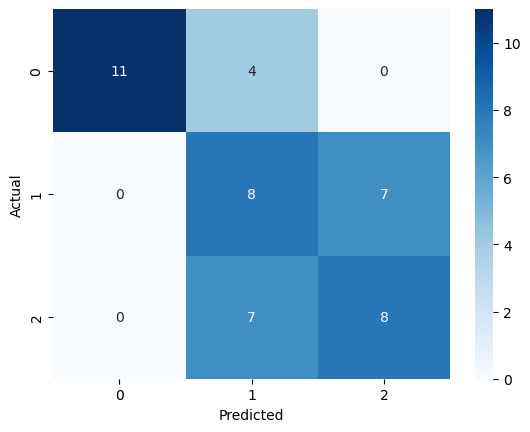

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.42      0.53      0.47        15
           2       0.53      0.53      0.53        15

    accuracy                           0.60        45
   macro avg       0.65      0.60      0.62        45
weighted avg       0.65      0.60      0.62        45



In [421]:
rbf_svm_param = svm.SVC(kernel = 'rbf', decision_function_shape = 'ovo', C = 1, gamma = 100).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], rbf_svm_param, 'Sepal.length', 'Sepal.width', 'SVM with RBF kernel and C = 1, Gamma = 100')
plot_confusion_matrix(rbf_svm_param, x_test)
## No misclassification + overfitting

### Analysis of output
As we have explained, the Gamma parameter has a reverse relation with similarity raduis. When comparing decision boundries of the three plots shown above, we can conclude that they have become more curved. When Gamma equals 100, the model overfits badly, which can be viewed in its performance on test dataset.

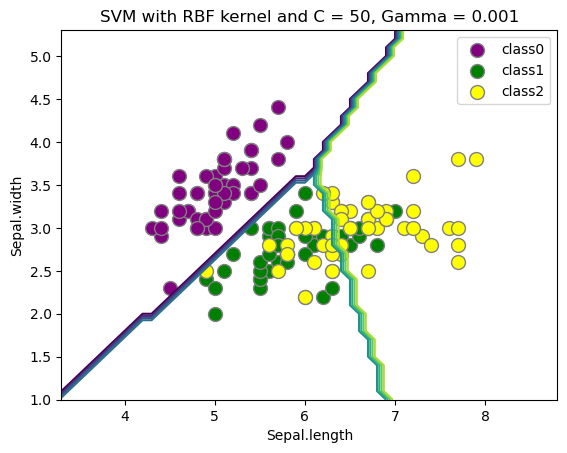

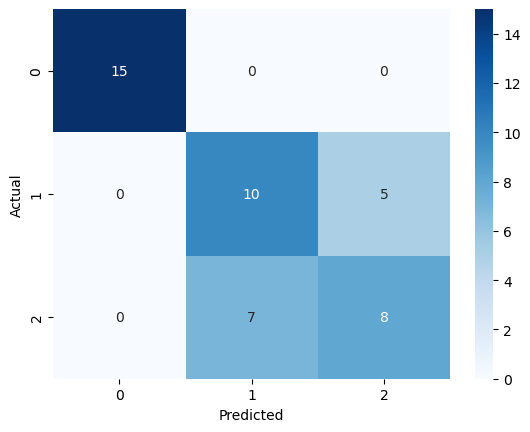

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.59      0.67      0.62        15
           2       0.62      0.53      0.57        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



In [412]:
rbf_svm_param = svm.SVC(kernel = 'rbf', decision_function_shape = 'ovo', C = 50, gamma = 0.001).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], rbf_svm_param, 'Sepal.length', 'Sepal.width', 'SVM with RBF kernel and C = 50, Gamma = 0.001')
plot_confusion_matrix(rbf_svm_param, x_test)
## For low Gamma values, C is decisive for complexity

## Part D: using grid-search to find the best estimator
Grid Search is a feature of Sklearn Library which chooses the best model based on a range of hyperparameters. In other words, it receives a list of values, and returns the most efficient model whose parameters are chosen from the input list. 

In [24]:
def make_best_svm(param_grid):
    Svm = GridSearchCV(svm.SVC(), param_grid, refit = True)
    Svm.fit(x_train, y_train)
    print('Best parameters: ')
    print(Svm.best_params_)
    return Svm 

Best parameters: 
{'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}


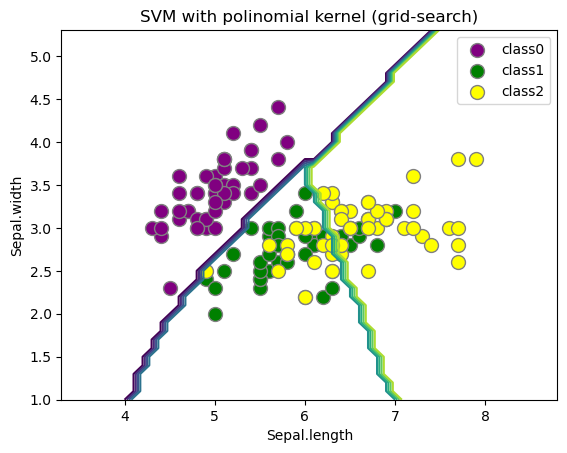

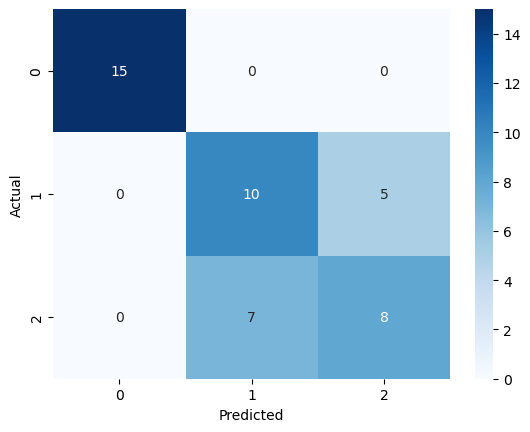

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.59      0.67      0.62        15
           2       0.62      0.53      0.57        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



In [435]:
param_grid_poly = {'C': [0.1, 0.5, 1, 10, 50], 
                   'gamma': [5, 1, 0.5, 0.1, 0.01, 0.001],
                   'kernel': ['poly'],
                   'degree': [3]
                  }
grid_poly = make_best_svm(param_grid_poly)
show_results(features[:, 0], features[:, 1], grid_poly, 'Sepal.length', 'Sepal.width', 'SVM with polinomial kernel (grid-search)')
plot_confusion_matrix(grid_poly, x_test)

Best parameters: 
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


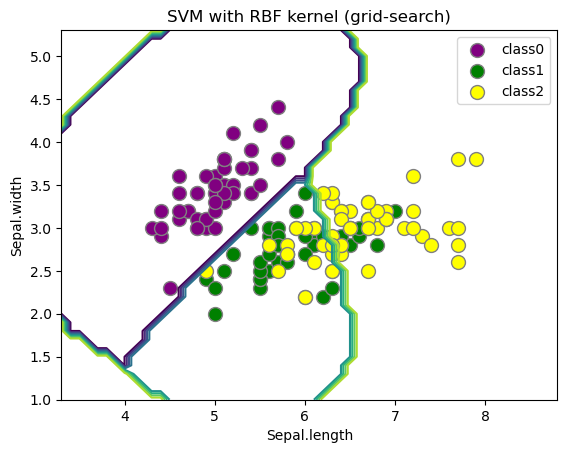

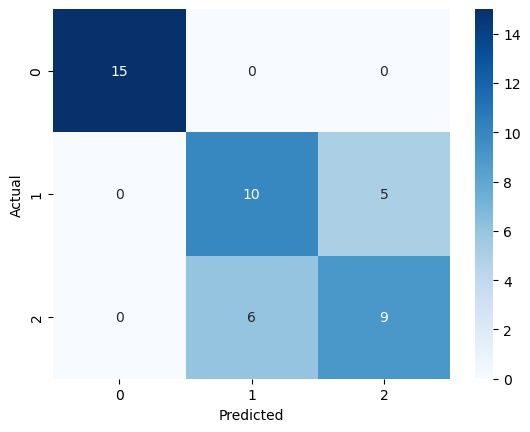

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [437]:
param_grid_rbf = {'C': [0.1, 0.5, 1, 10, 50], 
                   'gamma': [5, 1, 0.5, 0.1, 0.01, 0.001],
                   'kernel': ['rbf']
                  }
grid_rbf = make_best_svm(param_grid_rbf)
show_results(features[:, 0], features[:, 1], grid_rbf, 'Sepal.length', 'Sepal.width', 'SVM with RBF kernel (grid-search)')
plot_confusion_matrix(grid_rbf, x_test)

Best parameters: 
{'C': 1, 'gamma': 5, 'kernel': 'linear'}


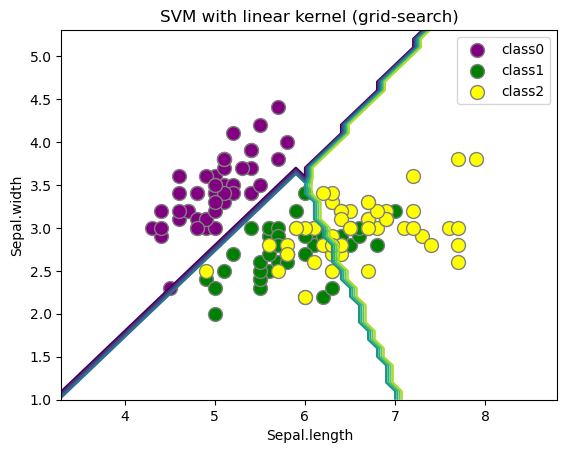

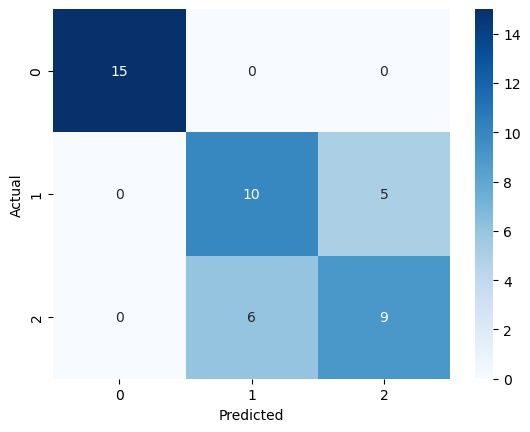

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [438]:
param_grid_linear = {'C': [0.1, 0.5, 1, 10, 50], 
                     'gamma': [5, 1, 0.5, 0.1, 0.01, 0.001],
                     'kernel': ['linear']
                    }
grid_linear = make_best_svm(param_grid_linear)
show_results(features[:, 0], features[:, 1], grid_linear, 'Sepal.length', 'Sepal.width', 'SVM with linear kernel (grid-search)')
plot_confusion_matrix(grid_linear, x_test)

### Analysis of output
We have listed some values for both C and Gamma parameters, and the tuned SVR is resulted from them. The best model having the highest value of precision and recall is a SVR whose kernel, C, and Gamma parameters are RBF, 0.1, and 1 respectively.

# Part E: Using two approaches of one-vs-one and one-vs-rest
In one-vs-one method, each pair of classes corresponds to a decision boundry. Hence, the classification algorithm is done $\frac{n(n - 1)}{2}$ times, which is definitely more than the one-vs-rest method ($n$ times). We use the parameters obtained by Grid-Search.

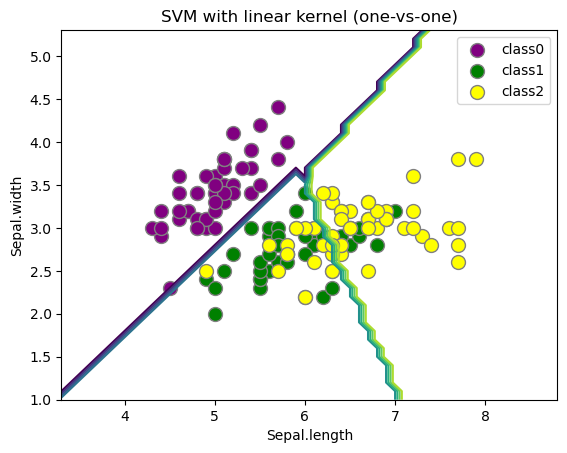

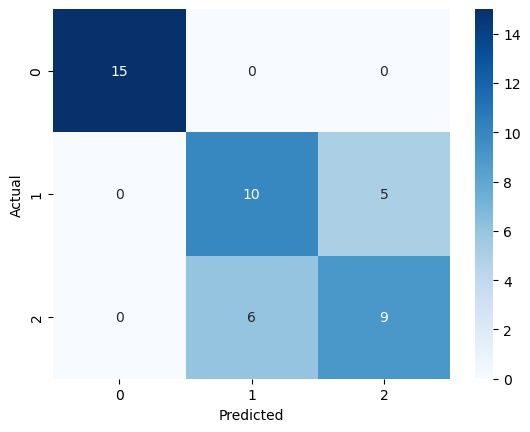

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [440]:
linear_svm_ovo = svm.SVC(kernel = 'linear', decision_function_shape = 'ovo', C = 1, gamma = 5).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], linear_svm_ovo, 'Sepal.length', 'Sepal.width', 'SVM with linear kernel (one-vs-one)')
plot_confusion_matrix(linear_svm_ovo, x_test)

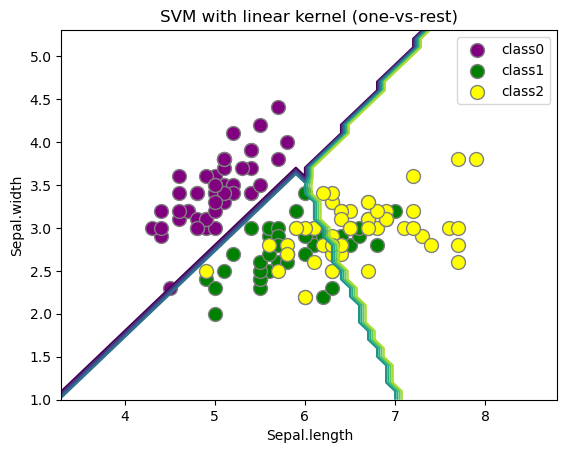

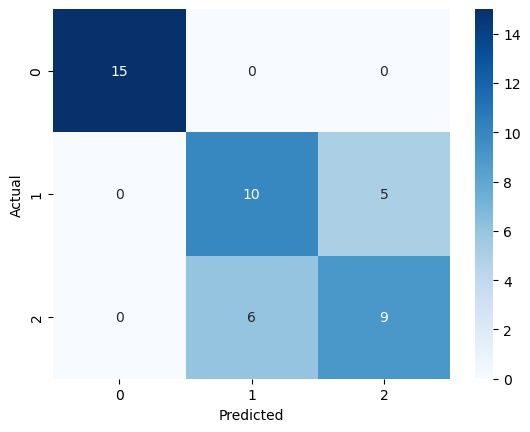

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [441]:
linear_svm_ovr = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr', C = 1, gamma = 5).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], linear_svm_ovr, 'Sepal.length', 'Sepal.width', 'SVM with linear kernel (one-vs-rest)')
plot_confusion_matrix(linear_svm_ovr, x_test)

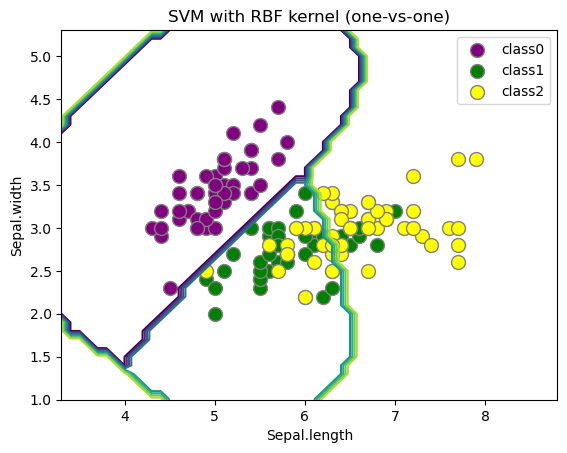

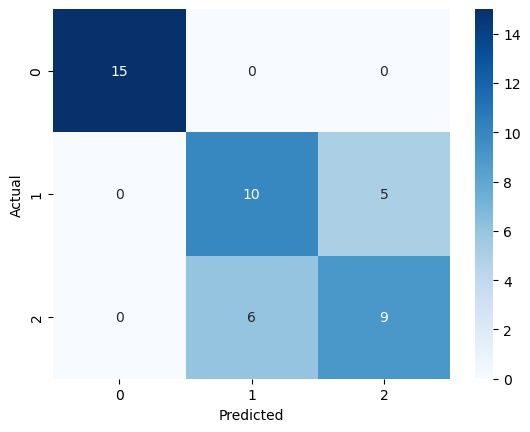

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [448]:
rbf_svm_ovo = svm.SVC(kernel = 'rbf', decision_function_shape = 'ovo', C = 0.1, gamma = 1).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], rbf_svm_ovo, 'Sepal.length', 'Sepal.width', 'SVM with RBF kernel (one-vs-one)')
plot_confusion_matrix(rbf_svm_ovo, x_test)

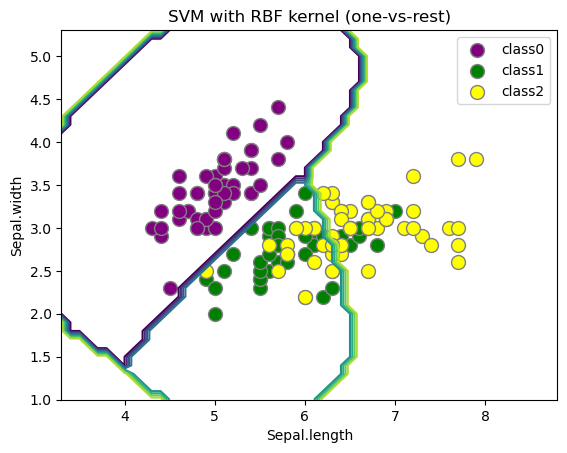

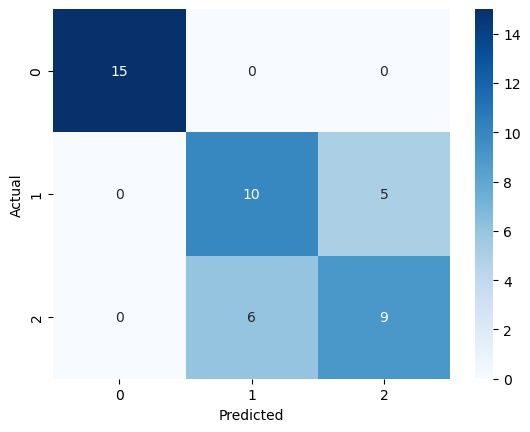

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [450]:
rbf_svm_ovr = svm.SVC(kernel = 'rbf', decision_function_shape = 'ovr', C = 0.1, gamma = 1).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], rbf_svm_ovr, 'Sepal.length', 'Sepal.width', 'SVM with RBF kernel (one-vs-rest)')
plot_confusion_matrix(rbf_svm_ovr, x_test)

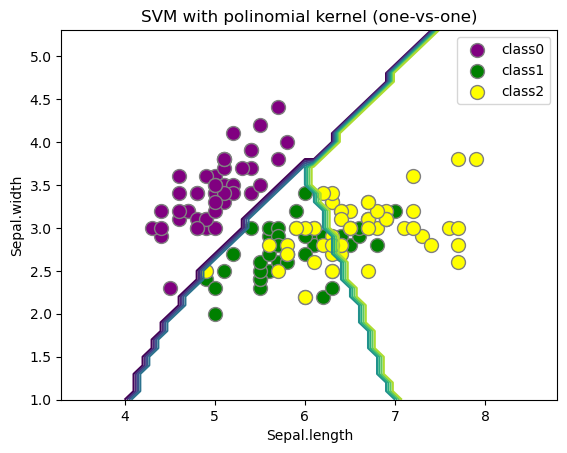

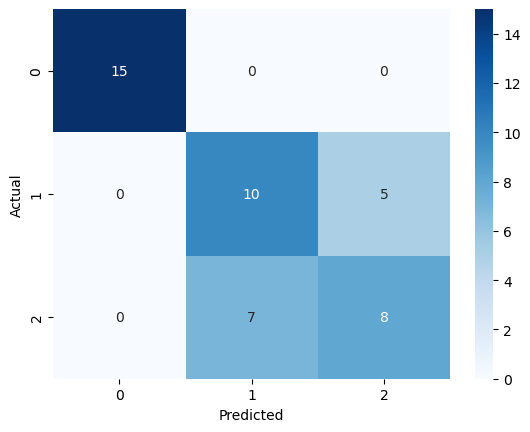

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.59      0.67      0.62        15
           2       0.62      0.53      0.57        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



In [16]:
poly_svm_ovo = svm.SVC(kernel = 'poly', decision_function_shape = 'ovo', C = 0.1, gamma = 0.1, degree = 3).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], poly_svm_ovo, 'Sepal.length', 'Sepal.width', 'SVM with polinomial kernel (one-vs-one)')
plot_confusion_matrix(poly_svm_ovo, x_test)

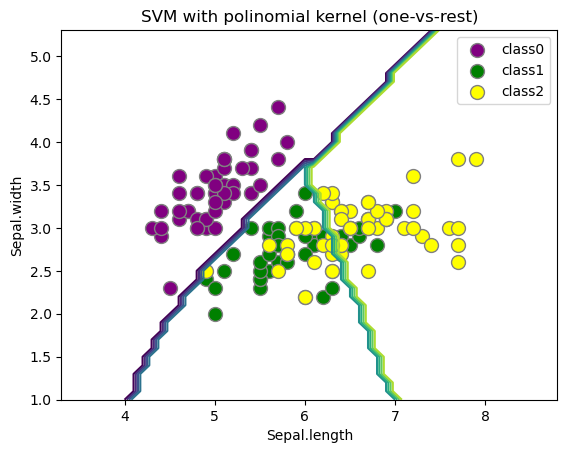

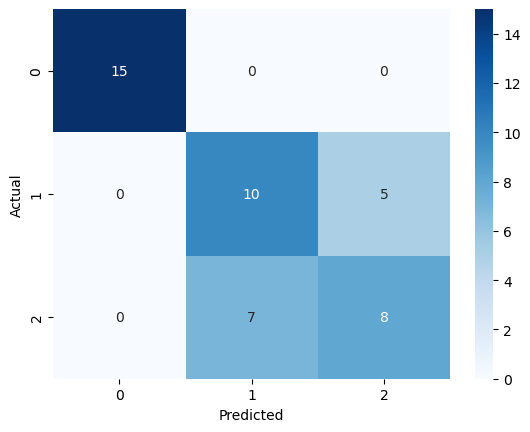

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.59      0.67      0.62        15
           2       0.62      0.53      0.57        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



In [17]:
poly_svm_ovr = svm.SVC(kernel = 'poly', decision_function_shape = 'ovr', C = 0.1, gamma = 0.1, degree = 3).fit(x_train, y_train)
show_results(features[:, 0], features[:, 1], poly_svm_ovr, 'Sepal.length', 'Sepal.width', 'SVM with polinomial kernel (one-vs-rest)')
plot_confusion_matrix(poly_svm_ovr, x_test)

# Part F: using the third and forth options for classification
Now we use the third and forth attributes for classification. Hyper parameters are calculated by using grid-search.

In [23]:
x_train, x_test, y_train, y_test = split_into_train_test(features[:, 2:4], labels)

Best parameters: 
{'C': 50, 'gamma': 5, 'kernel': 'linear'}


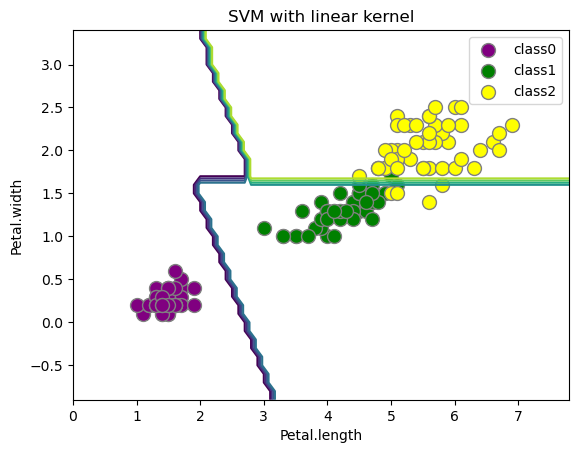

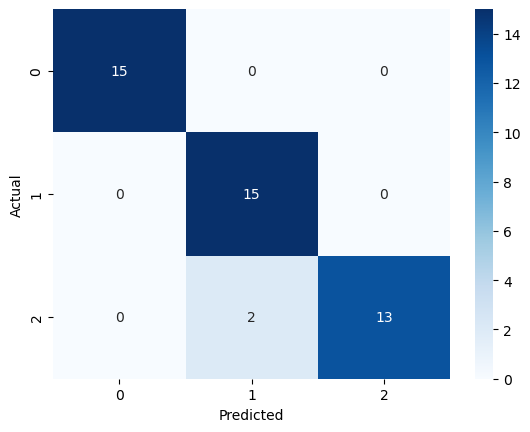

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [26]:
param_grid_linear = {'C': [0.1, 0.5, 1, 10, 50], 
                   'gamma': [5, 1, 0.5, 0.1, 0.01, 0.001],
                   'kernel': ['linear']
                  }
grid_linear = make_best_svm(param_grid_linear)
show_results(features[:, 2], features[:, 3], grid_linear, 'Petal.length', 'Petal.width', 'SVM with linear kernel')
plot_confusion_matrix(grid_linear, x_test)

Best parameters: 
{'C': 10, 'gamma': 5, 'kernel': 'rbf'}


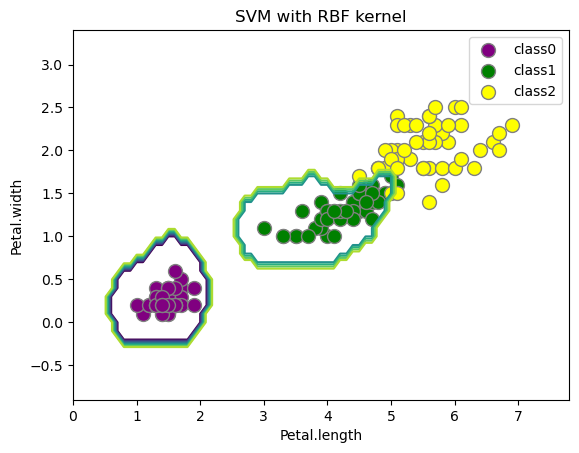

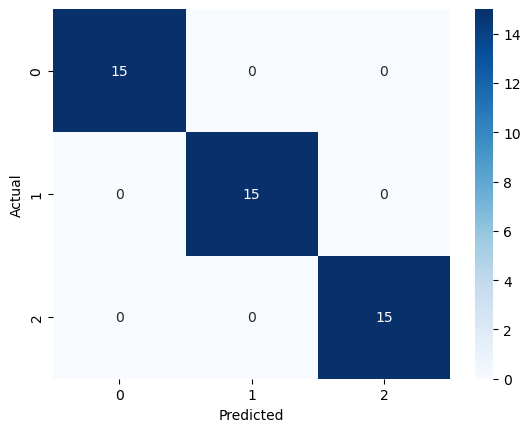

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [27]:
param_grid_rbf = {'C': [0.1, 0.5, 1, 10, 50], 
                   'gamma': [5, 1, 0.5, 0.1, 0.01, 0.001],
                   'kernel': ['rbf']
                  }
grid_rbf = make_best_svm(param_grid_rbf)
show_results(features[:, 2], features[:, 3], grid_rbf, 'Petal.length', 'Petal.width', 'SVM with RBF kernel')
plot_confusion_matrix(grid_rbf, x_test)

Best parameters: 
{'C': 0.5, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}


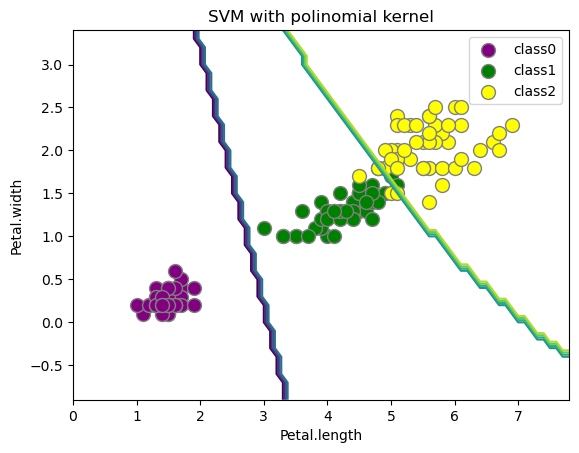

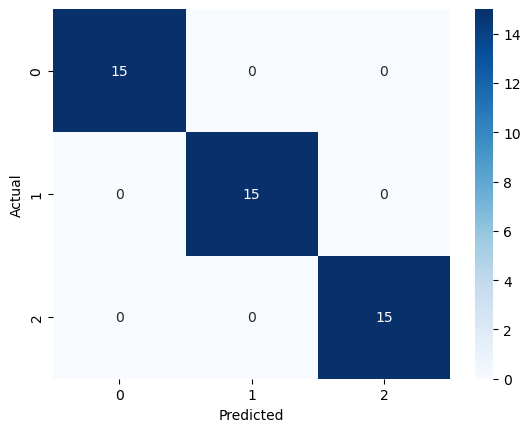

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [28]:
param_grid_poly = {'C': [0.1, 0.5, 1, 10, 50], 
                   'gamma': [5, 1, 0.5, 0.1, 0.01, 0.001],
                   'kernel': ['poly'],
                   'degree': [3]
                  }
grid_poly = make_best_svm(param_grid_poly)
show_results(features[:, 2], features[:, 3], grid_poly, 'Petal.length', 'Petal.width', 'SVM with polinomial kernel')
plot_confusion_matrix(grid_poly, x_test)

### Analysis of output
As the graphs which are drawn above indicate, using these features enables us to separate classes more easily. Formerly, the positions of class1 and class2 samples were too mixed, thus making it hard to seperate them even with a polinomial curve. But when we consider petal.length and petal.width attributes, classification becomes more convenient. The values of recall, precision, and f1-score (all equal to 100%) demostrate how well test samples are grouped. 